### Import libraries

In [375]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [376]:
data = pd.read_csv("Carseats.csv") 

In [377]:
data.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [378]:
data.describe()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,115.614301,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,1.000000,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,100.750000,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,200.500000,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,300.250000,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,400.000000,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [274]:
#data = data.head(50)

In [379]:
data.dtypes

Unnamed: 0       int64
Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [382]:
data2 = data.head(100)

In [383]:
def urban(x):
    i = 0
    data2['urban'] = 0
    for each in x:
        if (each == 'Yes'):
            data2['urban'][i] = 1
        else:
            data2['urban'][i] = 0
        i = i + 1
    return data2

In [384]:
data2 = urban(data2['Urban'])

C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP WORLD\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  "

In [385]:
data2 = data2.drop(['Unnamed: 0'],axis = 1)

In [398]:
X = data2[['CompPrice', 'Advertising', 'Price', 'Age']]
y = data2['Sales']

In [399]:
data2.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
urban            int64
dtype: object

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [401]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [402]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CompPrice,0.110535
Advertising,0.191530
Price,-0.098273
Age,-0.046325


In [403]:
y_pred = regressor.predict(X_test)

In [404]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
26,8.33,4.985544
86,8.70,8.412103
2,10.06,10.052241
55,6.85,5.045748
75,8.55,9.664962
93,8.86,9.500793
16,7.58,5.556111
73,12.61,9.543463
54,4.90,5.871027
95,5.58,5.690876


In [405]:
print("Residual sum of squares: %.2f"
  % ((y_pred - y_test) ** 2).sum())

Residual sum of squares: 65.25


In [406]:
regressor.score(X,y)

0.5528859386228665

In [368]:
#accuracy_score(y_test, y_pred)

In [407]:
X_ = sm.add_constant(X)

In [408]:
model = sm.OLS(y,X_).fit()

In [409]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     29.75
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           4.85e-16
Time:                        23:22:41   Log-Likelihood:                -214.07
No. Observations:                 100   AIC:                             438.1
Df Residuals:                      95   BIC:                             451.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.7508      1.909      3.536      0.001       2.961      10.541
CompPrice       0.1065      0.015      7.022      0.000       0.076       0.137
Advertising     0.1869      0.032      5.752      0.000       0.122       0.251
Price          -0.0954      0.012     -8.236      0.000      -0.118      -0.072
Age            -0.0489      0.015     -3.352      0.001      -0.078      -0.020
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.626
Skew:                           0.221   Prob(JB):                        0.444
Kurtosis:                       2.559   Cond. No.                     1.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

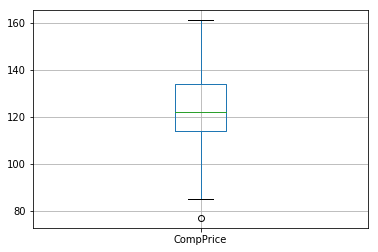

In [410]:
data2.boxplot(['CompPrice'])

### Activity 
Try playing around with data and remove outliers to check if it improves accuracy